# 前置知识

## 网站的加载形式有两种：静态加载和动态加载

### 静态加载

在静态加载中，当你访问一个网页时，服务器会发送一个完整的HTML页面。
所有的内容，包括文本、图片和链接，都嵌入在这个HTML文档中。
CSS和JavaScript通常作为外部文件加载，但它们主要用于增强页面的外观和感觉，而不是改变内容。

对爬虫的影响：

易于爬取：静态页面可以直接通过HTTP请求获取，然后使用HTML解析器（如BeautifulSoup）提取所需信息。
无需执行JavaScript：不需要处理JavaScript生成的内容。

### 动态加载

如何加载：

动态加载的网页通常使用Ajax（Asynchronous JavaScript and XML）或其他JavaScript框架来异步加载数据。
当你访问这样的网页时，初始的HTML文档可能不包含所有内容。随后，JavaScript会被执行来加载更多数据。
这些数据可能来自服务器的额外HTTP请求，通常返回JSON或XML格式的数据。

对爬虫的影响：

更复杂的爬取过程：由于内容是动态加载的，传统的HTTP请求和HTML解析可能无法获取所有数据。
需要模拟浏览器或分析JavaScript：可能需要使用如Selenium之类的工具来模拟浏览器行为，或分析JavaScript代码和网络请求来直接获取数据。
可能涉及到更多的反爬机制：动态加载的网站可能有更复杂的反爬虫策略。

# 爬取网易云音乐的用户评论

在刷新网易云音乐的一首歌曲下面的评论的时候，发现浏览器的URL都没有发生变化，应该是采用Ajax刷新了网页的部分内容。
对于这样网站的爬虫有两个思路：
1.  在浏览器的控制台上刷新时候查看“网络”部分，分析发送的请求，在相应的进行模拟
2.  使用selenium工具进行模拟

本次任务采用selenium进行模拟进行爬取评论。

执行的代码放在get_comments.py中，直接在那边执行就好，感觉在jupyter中执行会卡。
使用selenium进行用户的模拟操作，爬取约260页内容，包括等待页面加载sleep(2)秒，差不多要几分钟才能执行完

In [3]:
# get_comments.py

from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep

# 创建ChromeOptions对象并启用无头模式
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
driver = webdriver.Chrome(options=chrome_options)

# 打开网站
driver.get('https://music.163.com/#/song?id=1392155391')
# 设定起始页号
page_number = 1

# 定位元素框架
comment_frame = driver.switch_to.frame('g_iframe')

while page_number<260:

    # 滚动到页面底部，确保所有的评论都被加载
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # 等待一段时间，让评论加载
    sleep(2)
    
    # 定位评论和时间
    comments = driver.find_elements(By.CSS_SELECTOR, ".cnt.f-brk")
    times = driver.find_elements(By.CSS_SELECTOR, ".time.s-fc4")

    # 写入到文件
    with open(f'comments_page_{page_number}.txt', 'w', encoding='utf-8') as f:
        for comment in comments:
            # 提取评论用户名、文本、时间
            text = comment.text
            time = times[comments.index(comment)].text
            # 在控制台打印评论
            print(f'page_{page_number}:'+time+' '+text)
            # 写入文件
            f.write(time+' '+text + '\n')

    # 翻到下一页
    try:
        next_page_button = driver.find_element(By.CSS_SELECTOR, '.zbtn.znxt')
        next_page_button.click()
        page_number += 1
    except Exception as e:
        # 如果找不到 "下一页" 按钮，说明已经到达最后一页，跳出循环
        break
        
        # 事实上，他会一直在最后一个页面循环输出相同的结果
        # 解决方法1：手动终止程序，删除多余的txt
        # 解决方法2：写成for循环，硬编码最大页数
        # !!这里采用了硬编码最大页数的方法
    
# 关闭浏览器和结束 WebDriver 会话
driver.quit()

TimeoutException: Message: timeout: Timed out receiving message from renderer: 299.676
  (Session info: chrome-headless-shell=120.0.6099.216)
Stacktrace:
0   chromedriver                        0x0000000102a344dc chromedriver + 4162780
1   chromedriver                        0x0000000102a2c664 chromedriver + 4130404
2   chromedriver                        0x0000000102683bc0 chromedriver + 293824
3   chromedriver                        0x000000010266bc3c chromedriver + 195644
4   chromedriver                        0x000000010266bad0 chromedriver + 195280
5   chromedriver                        0x0000000102669e3c chromedriver + 187964
6   chromedriver                        0x000000010266ab30 chromedriver + 191280
7   chromedriver                        0x0000000102679f5c chromedriver + 253788
8   chromedriver                        0x000000010268f4b4 chromedriver + 341172
9   chromedriver                        0x000000010266b1e0 chromedriver + 192992
10  chromedriver                        0x000000010268f2d0 chromedriver + 340688
11  chromedriver                        0x0000000102709bd8 chromedriver + 842712
12  chromedriver                        0x00000001026bd6bc chromedriver + 530108
13  chromedriver                        0x00000001026be930 chromedriver + 534832
14  chromedriver                        0x00000001029f9e08 chromedriver + 3923464
15  chromedriver                        0x00000001029fe3dc chromedriver + 3941340
16  chromedriver                        0x00000001029e2038 chromedriver + 3825720
17  chromedriver                        0x00000001029fef3c chromedriver + 3944252
18  chromedriver                        0x00000001029d46f4 chromedriver + 3770100
19  chromedriver                        0x0000000102a1b980 chromedriver + 4061568
20  chromedriver                        0x0000000102a1baf8 chromedriver + 4061944
21  chromedriver                        0x0000000102a2c2e4 chromedriver + 4129508
22  libsystem_pthread.dylib             0x00000001aa58826c _pthread_start + 148
23  libsystem_pthread.dylib             0x00000001aa58308c thread_start + 8


运行 get_comments.py

然后会得到一堆.txt文件，用python或者shell脚本把他们合在一起，接下来进行数据分析

# 数据分析

## 文本预处理

这里处理日期很粗糙，我想要替换的时间“1月4日”，“昨天 16:09”，“4小时前”这一类的时间
但是有的用户在评论内也会提到“昨天”，“x月x日”这类的字眼；
在这里进行替换之后，把txt转换为dataframe的过程是通过是别“x年x月x日”来把时间划分出来，之后再划分用户名和评论内容；
如果在用户的评论中的“x月x日”直接替换为了“x年x月x日”，就会导致'comment'这一列为None，在后续绘制词云图会出现TypeError
因为这一部分评论很少（3条），所以我采取了直接剔除的操作

In [4]:
import re
from datetime import datetime, timedelta

# 获取当前日期
current_date = datetime.now()

with open('comments.txt', 'r', encoding='utf-8') as f:
    content = f.readlines()  # 读取文件的所有行到一个列表中

new_content = []  # 创建一个新的列表来存储处理后的行
for line in content:  # 遍历文件的每一行
    if '分钟前' in line:  # 如果行中包含 '分钟前'
        # 使用实际的日期替换 '分钟前'
        line = re.sub(r'\d+分钟前', current_date.strftime('%Y年%m月%d日'), line)
    elif '昨天' in line:  # 如果行中包含 '昨天'
        # 计算昨天的日期
        date = current_date - timedelta(days=1)
        # 使用昨天的日期替换 '昨天'
        line = re.sub('昨天', date.strftime('%Y年%m月%d日'), line)
    elif re.search(r'\b\d+月\d+日\b', line):  # 如果行中包含没有年份的 '月' 和 '日'
        # 在日期前面添加年份
        line = re.sub(r'(\b\d+月\d+日\b)', f'{current_date.year}年\\1', line)
    new_content.append(line)  # 将处理后的行添加到新的列表中

# 写入文件
# 使用 'w' 模式打开文件，这意味着文件将被写入
# 如果文件已经存在，它将被覆盖
with open('comments.txt', 'w', encoding='utf-8') as f:
    f.writelines(new_content)  # 将新的列表写入到文件中

### 导入为dataframe进行数据处理

In [5]:
import re
import pandas as pd

# 读取文件
with open('comments.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# 使用正则表达式来匹配日期和评论
pattern = r'(\d{4}年\d{1,2}月\d{1,2}日 .+?)(?=\d{4}年\d{1,2}月\d{1,2}日 |$)'
comments = re.findall(pattern, text, re.DOTALL)

# 将每一条评论分割为 ['time', 'user_comment']
lines = [comment.split(' ', 1) for comment in comments]

# 创建 DataFrame
df = pd.DataFrame(lines, columns=['time', 'user_comment'])

# 再次分割用户名和评论内容
df[['user', 'comment']] = df['user_comment'].str.split('：', n=1, expand=True)

# 删除不需要的列
df = df.drop(columns=['user_comment'])

# 替换 'comment' 列中的 '\n'
df['comment'] = df['comment'].str.replace('\n', '')

# 查看 DataFrame
df.head(10)

,time,user,comment
0,2022年5月11日,sailingthemoon,哇 又涨了一个冷知识了……
1,2022年5月11日,西瓜END,笑死
2,2022年5月11日,大竹姐姐爱吃糖,天，这歌真的好听。
3,2022年5月11日,Tim-源,哪怕她把我的心踩的粉碎 也轮不到你来取悦我
4,2022年5月10日,郁我吖笨,不会吧 不会吧
5,2022年5月9日,最挚爱,怎么办 怎么才能真正放下啊
6,2022年5月9日,Moni_x-,挥别错的人是为了和对的人相逢
7,2022年5月9日,霸波儿嘣-,谢谢 治愈到了
8,2022年5月9日,TheMoon_Represents,怎么办我还在想你
9,2022年5月8日,奇妙猪精,希望你是真的释怀了，而不是瞒着所有人偷偷难过


### 检查df中有无none

In [6]:
# 检查 'time', 'user', 'comment' 列是否包含 None，并打印出包含 None 的行
none_found = False

for col in ['time', 'user', 'comment']:
    if df[col].isnull().any():
        none_found = True
        print(f"'{col}' column contains None. The rows are:")
        print(df[df[col].isnull()])

if not none_found:
    print("No None values found in 'time', 'user', 'comment' columns.")

No None values found in 'time', 'user', 'comment' columns.


## 词云图

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/0m/vq8y8p61471b1p9frgcwqgjh0000gn/T/jieba.cache
Loading model cost 0.689 seconds.
Prefix dict has been built successfully.
/var/folders/0m/vq8y8p61471b1p9frgcwqgjh0000gn/T/ipykernel_9327/2940666143.py:40: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mk = imageio.imread("star.jpeg")


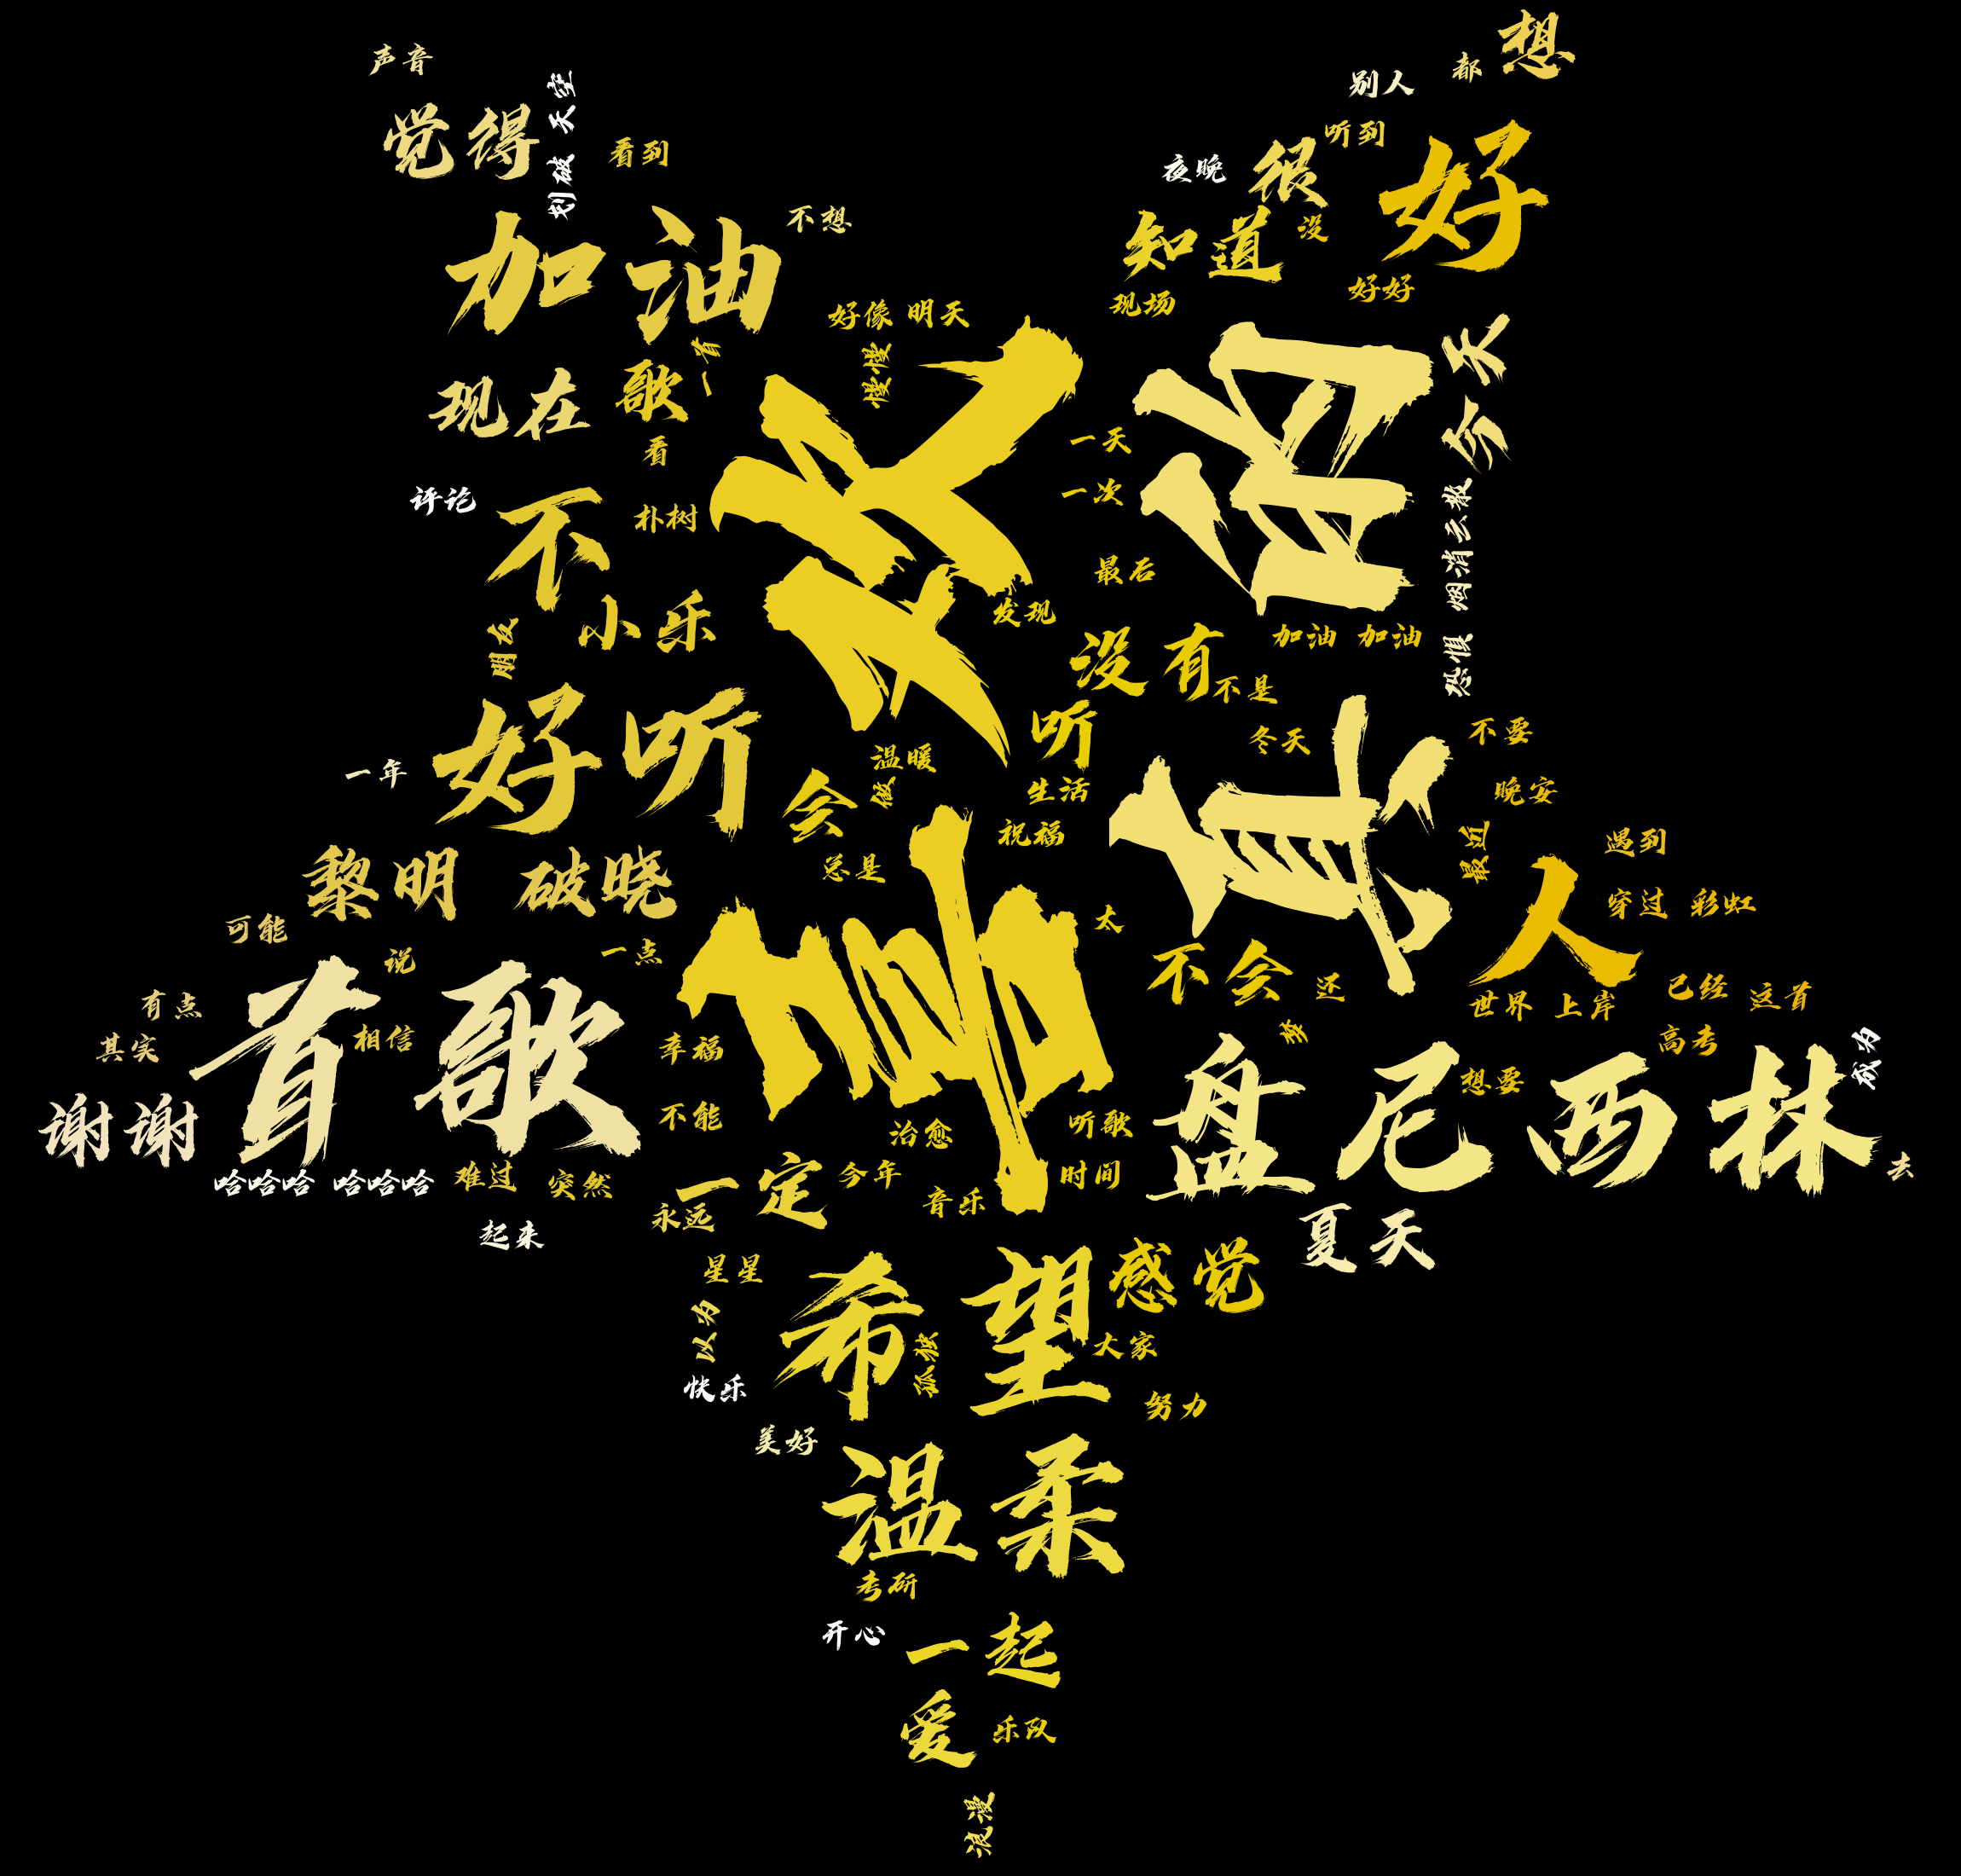

In [ ]:
import jieba
import wordcloud
from wordcloud import ImageColorGenerator
from IPython.display import Image
import imageio


# 使用open函数以读模式打开名为'stop_word.txt'的文件，文件编码为'utf-8'
# 使用with语句可以确保文件在使用完毕后会被正确关闭
with open('hit_stopwords.txt','r',encoding='utf-8') as jiebafile:
    # 使用readlines方法读取文件的所有行，返回一个包含每一行内容的列表
    stop_words=jiebafile.readlines()

# 使用列表推导式处理stop_words列表中的每一个元素
# 对于每一个元素w，使用strip方法去除其末尾的换行符'\n'
stop_words=[w.strip('\n') for w in stop_words]

# 使用join方法将comments列表中的所有元素连接成一个字符串，赋值给text
text="".join(df['comment'])

# 使用jieba库的lcut方法对text进行分词，返回一个包含所有分词结果的列表，赋值给jiebaword
jiebaword=jieba.lcut(text)

# 遍历jiebaword列表中的每一个元素（即每一个词）
# 如果一个词的长度为1，则从jiebaword列表中移除这个词
for word in jiebaword:
    if len(word)==1:
        jiebaword.remove(word)


# 使用filter函数和lambda表达式，从jiebaword列表中过滤掉所有在stop_words列表中的词
# filter函数返回一个迭代器，其中包含过滤后的词
words= filter(lambda x: x not in stop_words,jiebaword)

# 使用join方法将words迭代器中的所有元素连接成一个字符串，每个元素之间用逗号分隔，赋值给all_words
all_words=','.join(words)

# 词云图美化
# 加载遮罩图片
mk = imageio.imread("star.jpeg")


# 使用wordcloud库的WordCloud类创建一个词云对象，设置字体路径、宽度、高度、背景颜色、最大词数和边距
wcloud = wordcloud.WordCloud(font_path=r'毛笔体.ttf',width=1000, height=800,background_color='black',max_words=200,margin=2,mask=mk,scale=10)

# 使用generate方法根据all_words生成词云
wcloud.generate(all_words)

# 添加图片的色块
image_colors = ImageColorGenerator(mk)
# 使用recolor方法将词云颜色设置为图片的颜色
wcloud.recolor(color_func=image_colors)

# 使用to_file方法将生成的词云保存为名为'wordcloud.png'的图片文件
wcloud.to_file('wordcloud.png')

Image('wordcloud.png')

## 时间与评论数量

这里主要是想要看一下，随着歌曲的发布时间，评论的数量是怎么的一个增长趋势

In [10]:
# 把dataframe的time列转换为datetime类型
df['time'] = pd.to_datetime(df['time'], format='%Y年%m月%d日')
df.head(10)

,time,user,comment
0,2022-05-11,sailingthemoon,哇 又涨了一个冷知识了……
1,2022-05-11,西瓜END,笑死
2,2022-05-11,大竹姐姐爱吃糖,天，这歌真的好听。
3,2022-05-11,Tim-源,哪怕她把我的心踩的粉碎 也轮不到你来取悦我
4,2022-05-10,郁我吖笨,不会吧 不会吧
5,2022-05-09,最挚爱,怎么办 怎么才能真正放下啊
6,2022-05-09,Moni_x-,挥别错的人是为了和对的人相逢
7,2022-05-09,霸波儿嘣-,谢谢 治愈到了
8,2022-05-09,TheMoon_Represents,怎么办我还在想你
9,2022-05-08,奇妙猪精,希望你是真的释怀了，而不是瞒着所有人偷偷难过


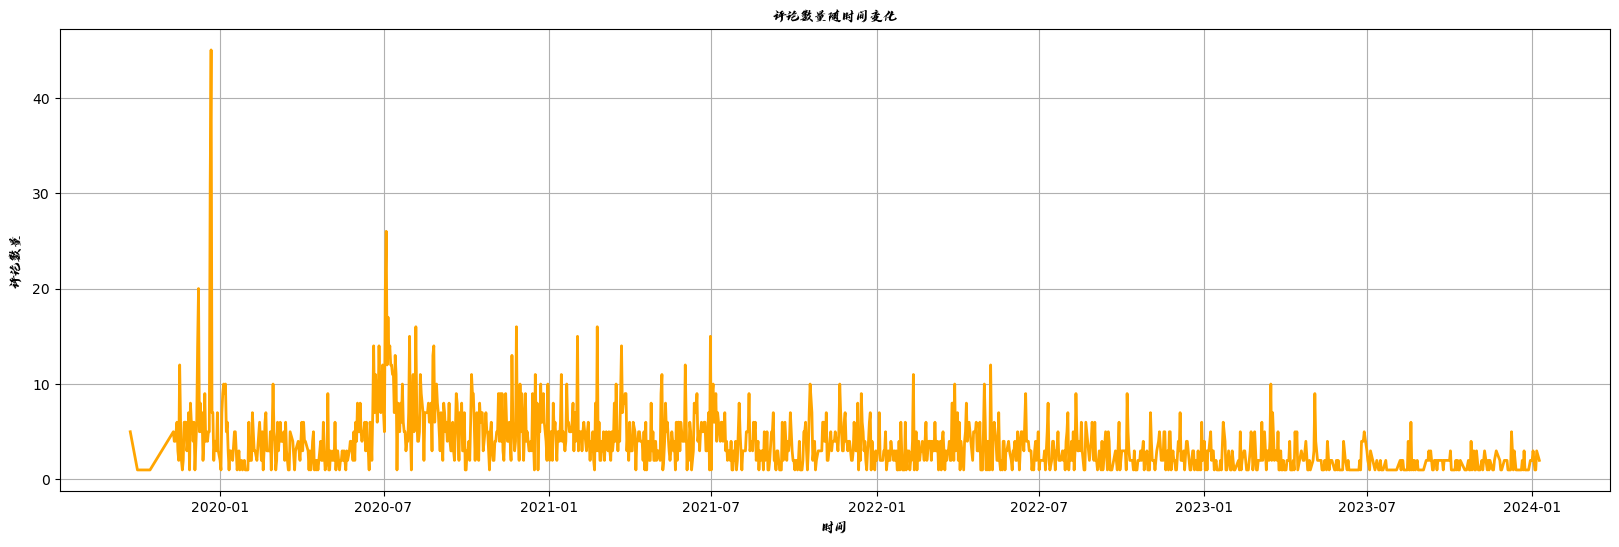

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties

# 设置图形大小
plt.figure(figsize=(20, 6))

# 绘制评论数量随时间变化的折线图，设置线的颜色为蓝色，宽度为2
plt.plot(df['time'].value_counts().sort_index(), color='orange', linewidth=2)

# 设置字体
font = FontProperties(fname="毛笔体.ttf")

# 添加标题和轴标签
plt.title('评论数量随时间变化', fontproperties=font)
plt.xlabel('时间', fontproperties=font)
plt.ylabel('评论数量', fontproperties=font)

# 添加网格线
plt.grid(True)

# 显示图形
plt.show()

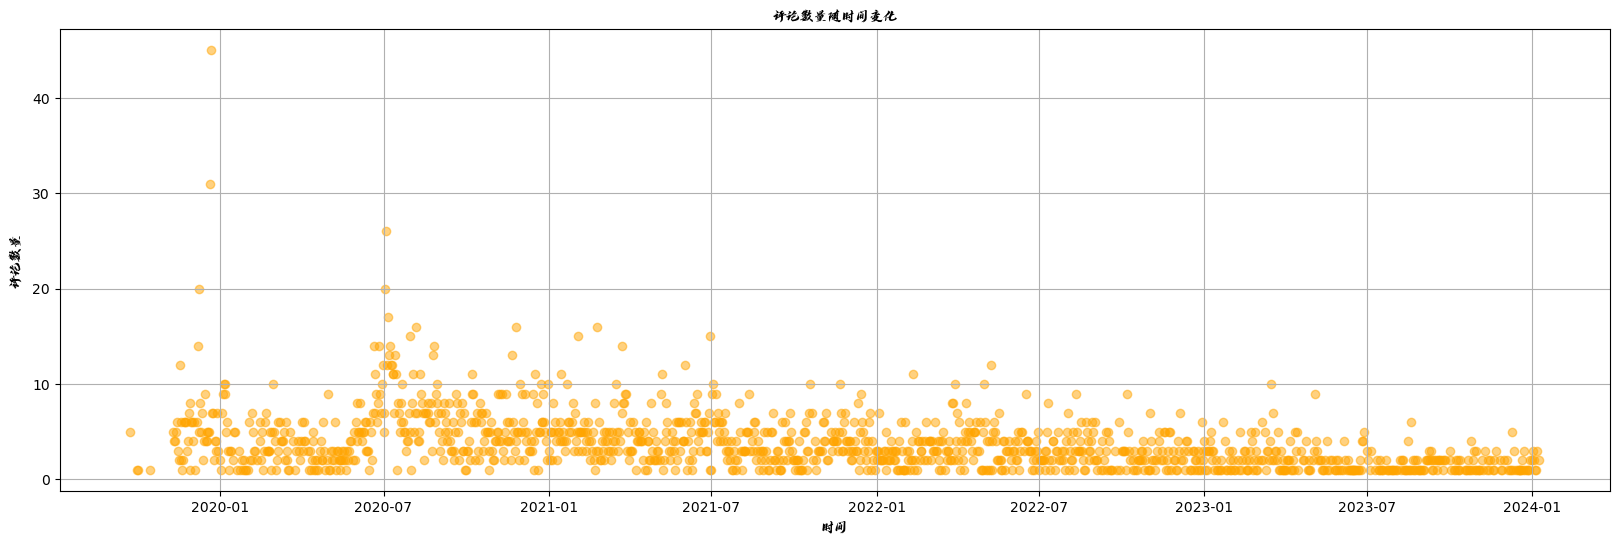

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 设置图形大小
plt.figure(figsize=(20, 6))

# 绘制评论数量随时间变化的散点图，设置点的颜色为蓝色，透明度为0.5
plt.scatter(df['time'].value_counts().sort_index().index, df['time'].value_counts().sort_index().values, color='orange', alpha=0.5)

# 添加标题和轴标签
plt.title('评论数量随时间变化', fontproperties=font)
plt.xlabel('时间', fontproperties=font)
plt.ylabel('评论数量', fontproperties=font)

# 添加网格线
plt.grid(True)

# 显示图形
plt.show()

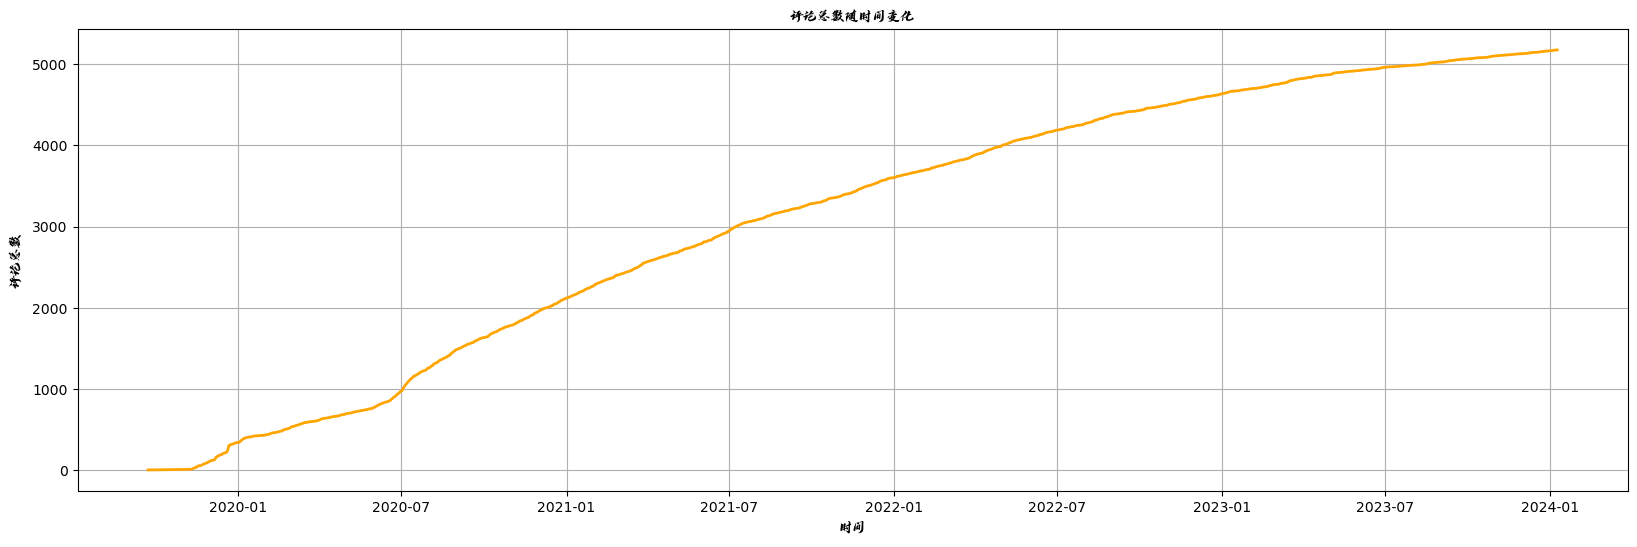

In [14]:
# 设置图形大小
plt.figure(figsize=(20, 6))

# 绘制评论总数随着时间变化的折线图，设置线的颜色为蓝色，宽度为2
plt.plot(df['time'].value_counts().sort_index().cumsum(), color='orange', linewidth=2)

# 添加标题和轴标签
plt.title('评论总数随时间变化', fontproperties=font)
plt.xlabel('时间', fontproperties=font)
plt.ylabel('评论总数', fontproperties=font)

# 添加网格线
plt.grid(True)

# 显示图形
plt.show()

## 情感分析

In [15]:
from snownlp import SnowNLP

# 检查 'comment' 列是否有非空值
if df['comment'].notna().any():
    df['情感分数'] = df['comment'].apply(lambda x: SnowNLP(x).sentiments if x else 0)
else:
    df['情感分数'] = 0

# 情感分数接近1表示正面情绪，接近0表示负面情绪
df.head(10)

,time,user,comment,情感分数
0,2022-05-11,sailingthemoon,哇 又涨了一个冷知识了……,0.897125
1,2022-05-11,西瓜END,笑死,0.491369
2,2022-05-11,大竹姐姐爱吃糖,天，这歌真的好听。,0.199793
3,2022-05-11,Tim-源,哪怕她把我的心踩的粉碎 也轮不到你来取悦我,0.561843
4,2022-05-10,郁我吖笨,不会吧 不会吧,0.278516
5,2022-05-09,最挚爱,怎么办 怎么才能真正放下啊,0.314085
6,2022-05-09,Moni_x-,挥别错的人是为了和对的人相逢,0.272691
7,2022-05-09,霸波儿嘣-,谢谢 治愈到了,0.571054
8,2022-05-09,TheMoon_Represents,怎么办我还在想你,0.403110
9,2022-05-08,奇妙猪精,希望你是真的释怀了，而不是瞒着所有人偷偷难过,0.935701


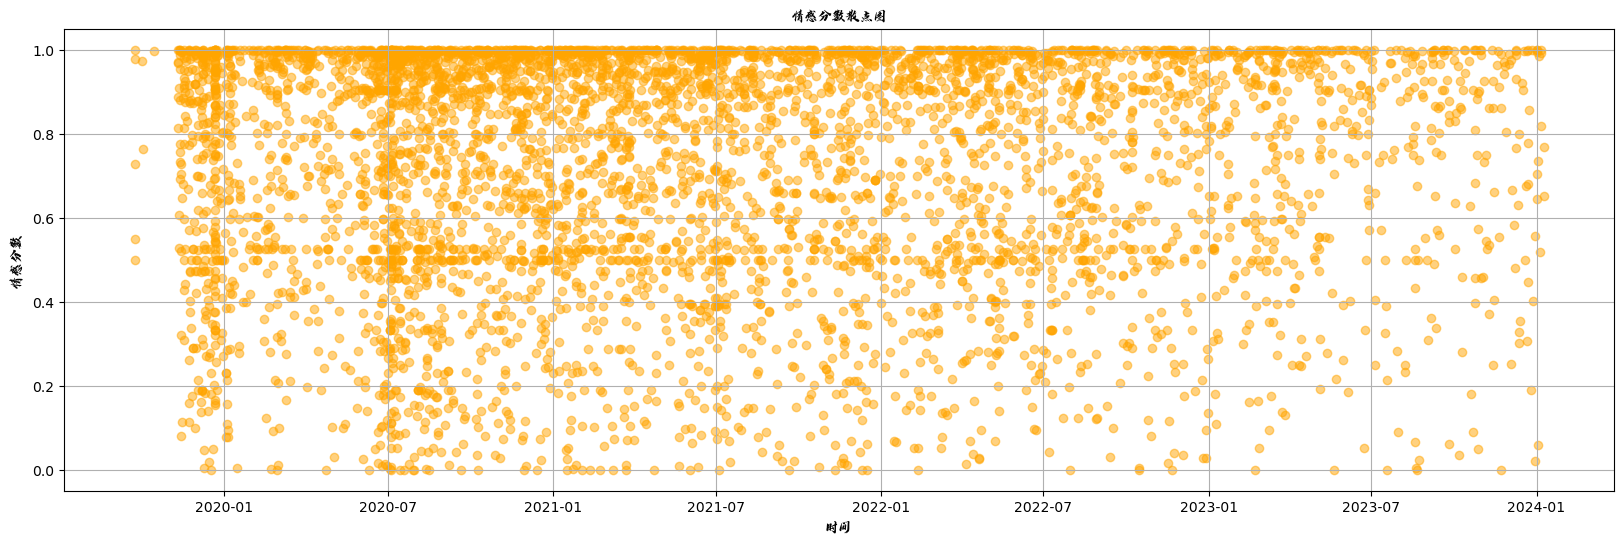

In [16]:
# 在绘制图形时，使用设置的字体
plt.figure(figsize=(20, 6))
plt.scatter(df['time'], df['情感分数'], color='orange', alpha=0.5)
plt.title('情感分数散点图', fontproperties=font)
plt.xlabel('时间', fontproperties=font)
plt.ylabel('情感分数', fontproperties=font)
plt.grid(True)
plt.show()

## 机器学习：主题探究

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # 转换为小写
    text = text.lower()
    
    # 删除标点符号和数字
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.translate(str.maketrans('', '', string.digits))
    
    # 删除停用词并进行词形还原
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    return ' '.join(tokens)

df['preprocessed'] = df['comment'].apply(preprocess)

# 特征提取
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000)
tf = vectorizer.fit_transform(df['preprocessed'])

# 主题模型
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
lda.fit(tf)

# 显示每个主题下权重较高的term
def print_top_words(model, feature_names, n_top_words):
  for topic_idx, topic in enumerate(model.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
  print()

print_top_words(lda, vectorizer.get_feature_names_out(), 10)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/serendipity1029/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/serendipity1029/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/serendipity1029/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Topic #0:
星划破天空 我也是 她穿过彩虹 哈哈哈 终于不再独自等待 太好听了 是的 可以 武汉加油 很好听
Topic #1:
还要多久 她才能如愿 会的 沾沾喜气 加油加油加油 抱抱 好可惜 日推 三部曲 孤独你我
Topic #2:
加油 不会吧 一定会的 加油加油 壶妹报道 一起 你可以的 好的 爱了 陌生人
Topic #3:
晚安 我也 盘尼西林 谢谢你 rse 星星躲闪 爱在黄昏日落时 上岸 小乐 好巧
Topic #4:
爱在黎明破晓前 祝福 哈哈哈哈 又是一个混乱的夜晚 想明白也很难过 可我就是很难过啊 会有的 年月日 晚安lili 一定
Topic #5:
谢谢 生日快乐 加油啊 加油呀 太温柔了 好喜欢 加油ง 嗯嗯 年度歌曲 我携满天星辰以赠你
Topic #6:
梦在黎明破晓时 sing song love 瞬间的耀眼 oh 永不会熄灭 我想你了 阳光万里 一定可以
Topic #7:
恐惧都烟消云散 照亮黑暗 高考加油 好好听 白岩松 哈哈 闪耀的梦 我也想 因你在云端 say
Topic #8:
壶妹 爱在黎明破晓时 喜欢 好温柔 不会吧不会吧 真的 再见 对对对 群星闪耀时 太好听了吧
Topic #9:
好听 真好 爱在日落黄昏时 祝福你 爱在午夜降临前 一起加油 勇敢 还有天 高考加油啊 啦啦啦

